In [20]:
import torch
import numpy
import re
import pandas as pd

from matplotlib import colors as mcolors
from pylab import *
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [29]:
x = torch.tensor([0.05, 0.06, 0.07, 0.08, 0.2, 0.3, 0.4, 0.5, 0.7, 0.99, 0.98, 0.97, 0.96])
x1 = torch.tensor([0.05, 0.06, 0.07, 0.08, 0.2, 0.3, 0.4, 0.5, 0.7, 0.99, 0.98, 0.97, 0.96])
x2 = torch.tensor([0.05, 0.06, 0.07, 0.08, 0.2, 0.3, 0.4, 0.5, 0.7, 0.99, 0.98, 0.97, 0.96])
x3 = torch.tensor([0.05, 0.06, 0.07, 0.08, 0.2, 0.3, 0.4, 0.5, 0.7, 0.99, 0.98, 0.97, 0.96])

(array([4., 1., 1., 1., 1., 0., 1., 0., 0., 4.]),
 array([0.05      , 0.14400001, 0.238     , 0.33200002, 0.426     ,
        0.52      , 0.614     , 0.708     , 0.802     , 0.896     ,
        0.99      ], dtype=float32),
 <BarContainer object of 10 artists>)

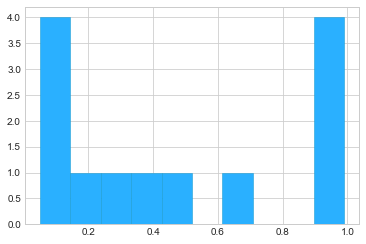

In [26]:
y = np.array([0.05, 0.06, 0.07, 0.08, 0.2, 0.3, 0.4, 0.5, 0.7, 0.99, 0.98, 0.97, 0.96])
plt.hist(x.numpy(), facecolor = '#2ab0ff', edgecolor='#169acf', density=False, linewidth=0.5, bins=10)

(array([4., 1., 1., 1., 1., 0., 1., 0., 0., 4.]),
 array([0.05      , 0.14400001, 0.238     , 0.33200002, 0.426     ,
        0.52      , 0.614     , 0.708     , 0.802     , 0.896     ,
        0.99      ], dtype=float32),
 <BarContainer object of 10 artists>)

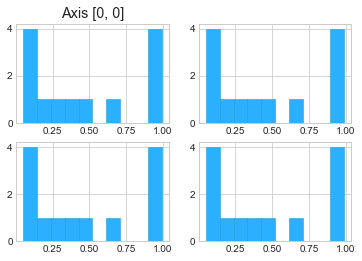

In [34]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(x.numpy(), facecolor = '#2ab0ff', edgecolor='#169acf', density=False, linewidth=0.5, bins=10)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].hist(x1.numpy(), facecolor = '#2ab0ff', edgecolor='#169acf', density=False, linewidth=0.5, bins=10)
axs[1, 0].hist(x2.numpy(), facecolor = '#2ab0ff', edgecolor='#169acf', density=False, linewidth=0.5, bins=10)
axs[1, 1].hist(x3.numpy(), facecolor = '#2ab0ff', edgecolor='#169acf', density=False, linewidth=0.5, bins=10)

In [35]:
x = torch.tensor([[0,0], [0,1], [0,3]])

In [36]:
x

tensor([[0, 0],
        [0, 1],
        [0, 3]])

In [37]:
x.flatten().numpy()

array([0, 0, 0, 1, 0, 3])